## Score: 28

## Comment: 

<font color=Red>
Q1.[10] Correct
<br><br>
Q2.[10+8] 2.2 You should make a regional map but not global. "Make a regional map of the same variable. Your figure should contain: a different project..."
<br><br>
</font>

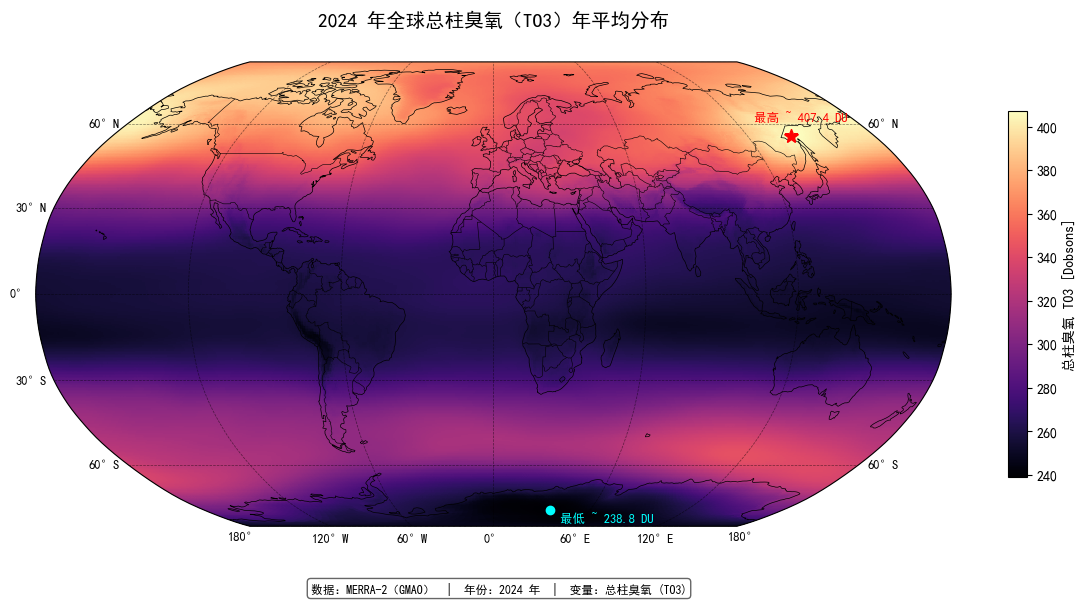

In [5]:
#PS4-2-1 2024年总柱臭氧的年平均分布

import os
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import rcParams
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

%matplotlib inline

# 让中文和负号正常显示
rcParams["font.sans-serif"] = ["SimHei"]
rcParams["axes.unicode_minus"] = False

# 读取 2024 年 12 个月的数据
data_dir = r"C:\PS3"
file_pattern = os.path.join(data_dir, "MERRA2_400.tavgM_2d_chm_Nx.2024*.nc4")
file_list = sorted(glob.glob(file_pattern))

# 检查数据的数量
if len(file_list) != 12:
    raise ValueError(f"预期 12 个文件，实际只找到了 {len(file_list)} 个，请检查路径或文件名。")

# 把 12 个月的数据沿时间维度拼接
ds = xr.open_mfdataset(
    file_list,
    combine="by_coords",
    engine="netcdf4",
)

to3 = ds["TO3"]  # 总柱臭氧 (time, lat, lon)

# 2024 年平均总柱臭氧场
to3_annual = to3.mean(dim="time").compute()

# 计算最大值点和全局最小值点
lat_vals = to3_annual["lat"].values
lon_vals = to3_annual["lon"].values
vals     = to3_annual.values               
flat = vals.ravel()                       

# 最大值
imax = np.nanargmax(flat)
ilat_max, ilon_max = np.unravel_index(imax, vals.shape)
val_max = flat[imax]
lat_max = float(lat_vals[ilat_max])
lon_max = float(lon_vals[ilon_max])

# 最小值
imin = np.nanargmin(flat)
ilat_min, ilon_min = np.unravel_index(imin, vals.shape)
val_min = flat[imin]
lat_min = float(lat_vals[ilat_min])
lon_min = float(lon_vals[ilon_min])

# 画图 
data_crs = ccrs.PlateCarree()   
map_crs  = ccrs.Robinson()     
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=map_crs)
ax.set_global()

# 铺图
ax.add_feature(cfeature.OCEAN, facecolor="lightblue", zorder=0)
ax.add_feature(cfeature.LAND,  facecolor="lightgrey", edgecolor="black", zorder=1)
ax.coastlines(linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)

# 总柱臭氧填色图
im = to3_annual.plot(
    ax=ax,
    transform=data_crs,
    cmap="magma",
    cbar_kwargs={
        "label": f"总柱臭氧 TO3 [{to3.attrs.get('units', 'DU')}]",
        "shrink": 0.7,
        "pad": 0.05
    }
)

#网格线和标签
gl = ax.gridlines(
    crs=data_crs,
    draw_labels=True,
    linewidth=0.5,
    color="black",
    alpha=0.5,
    linestyle="--"
)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 60))
gl.ylocator = mticker.FixedLocator(np.arange(-90,  91, 30))
gl.xlabel_style = {"size": 9}
gl.ylabel_style = {"size": 9}

ax.set_xlabel("经度 (°)", fontsize=11)
ax.set_ylabel("纬度 (°)", fontsize=11)

# 最大值和最小值点
# 最大值点：红
ax.plot(
    lon_max, lat_max,
    marker="*",
    color="red",
    markersize=10,
    transform=data_crs,
    zorder=5,
)

# 最小值点：蓝
ax.plot(
    lon_min, lat_min,
    marker="o",
    color="cyan",
    markersize=6,
    transform=data_crs,
    zorder=5,
)

# 最高值备注
ax.text(
    lon_max - 10,        
    lat_max + 6.5,         
    f"最高 ~ {val_max:.1f} DU",
    color="red",
    fontsize=9,
    ha="left",
    va="center",
    transform=data_crs,   
    zorder=6,
)

# 最低值备注
ax.text(
    lon_min + 10,
    lat_min - 5,
    f"最低 ~ {val_min:.1f} DU",
    color="cyan",
    fontsize=9,
    ha="left",
    va="center",
    transform=data_crs,
    zorder=6,
)


# 图表说明
bottom_text = (
    "数据：MERRA-2（GMAO）  |  年份：2024 年  |  变量：总柱臭氧 (TO3)"
)

fig.text(
    0.42, 0.02,                # 0.42 看着更舒服
    bottom_text,
    fontsize=8.5,
    va="bottom",
    ha="center",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.6)
)

# 标题 
ax.set_title("2024 年全球总柱臭氧（TO3）年平均分布", fontsize=14, pad=26)

plt.tight_layout(rect=[0, 0.06, 1, 1])  # 给底部留出放文本的空间
plt.show()


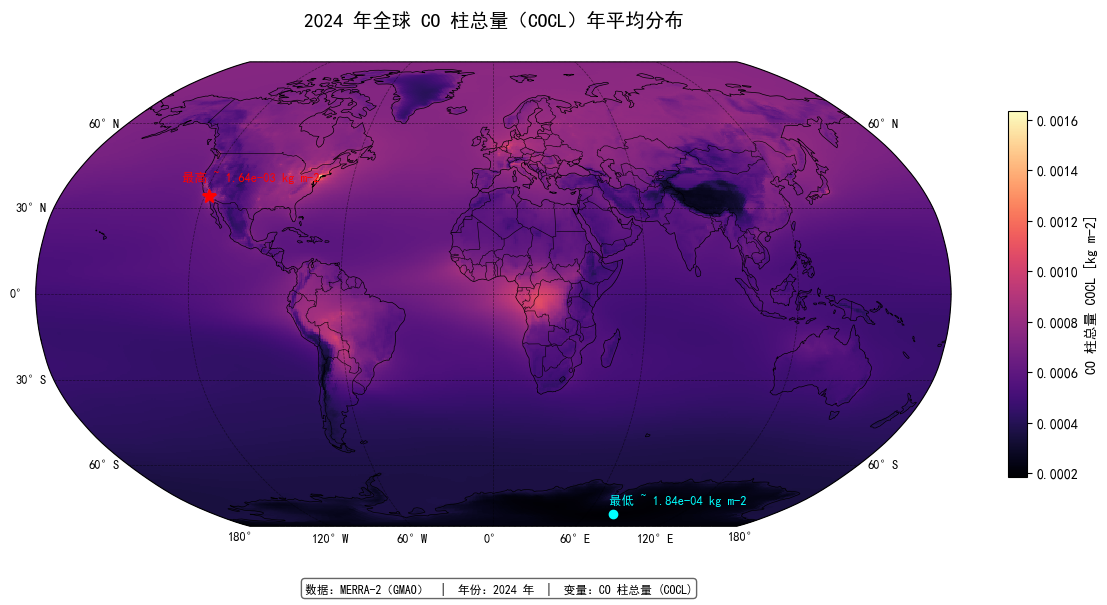

In [15]:
#PS4-2-2 2024年COCL的年平均分布

import os
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import rcParams
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
%matplotlib inline

# 让中文和负号正常显示
rcParams["font.sans-serif"] = ["SimHei"]     # 使用系统里的黑体
rcParams["axes.unicode_minus"] = False       # 负号正常显示

# 读取数据 
data_dir = r"C:\PS3"
file_pattern = os.path.join(data_dir, "MERRA2_400.tavgM_2d_chm_Nx.2024*.nc4")
file_list = sorted(glob.glob(file_pattern))

# 确保文件数目
if len(file_list) != 12:
    raise ValueError(f"预期 12 个文件，实际只找到了 {len(file_list)} 个，请检查路径或文件名。")

# 把 12 个月的数据沿时间维度拼在一起
ds = xr.open_mfdataset(
    file_list,
    combine="by_coords",    
    engine="netcdf4",
)

cocl = ds["COCL"]

# 计算 2024 年平均 CO 柱总量
cocl_annual = cocl.mean(dim="time").compute()   # 得到 (lat, lon)

# 找出最大值和最小值
lat_vals = cocl_annual["lat"].values
lon_vals = cocl_annual["lon"].values
vals     = cocl_annual.values                  

flat = vals.ravel()                           

# 最大值
imax = np.nanargmax(flat)
ilat_max, ilon_max = np.unravel_index(imax, vals.shape)
val_max = flat[imax]
lat_max = float(lat_vals[ilat_max])
lon_max = float(lon_vals[ilon_max])

# 最小值
imin = np.nanargmin(flat)
ilat_min, ilon_min = np.unravel_index(imin, vals.shape)
val_min = flat[imin]
lat_min = float(lat_vals[ilat_min])
lon_min = float(lon_vals[ilon_min])

unit_cocl = cocl.attrs.get("units", "kg m$^{-2}$")

# 画 COCL 年平均的全球分布图
data_crs = ccrs.PlateCarree()   
map_crs  = ccrs.Robinson()       

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=map_crs)
ax.set_global()

# 底图
ax.add_feature(cfeature.OCEAN, facecolor="lightblue", zorder=0)
ax.add_feature(cfeature.LAND,  facecolor="lightgrey", edgecolor="black", zorder=1)
ax.coastlines(linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)

# COCL 填色图
im = cocl_annual.plot(
    ax=ax,
    transform=data_crs,      
    cmap="magma",
    cbar_kwargs={
        "label": f"CO 柱总量 COCL [{unit_cocl}]",
        "shrink": 0.7,
        "pad": 0.05
    }
)

# 网格线和经纬度标签
gl = ax.gridlines(
    crs=data_crs,
    draw_labels=True,
    linewidth=0.5,
    color="black",
    alpha=0.5,
    linestyle="--"
)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 60))
gl.ylocator = mticker.FixedLocator(np.arange(-90,  91, 30))
gl.xlabel_style = {"size": 9}
gl.ylabel_style = {"size": 9}

ax.set_xlabel("经度 (°)", fontsize=11)
ax.set_ylabel("纬度 (°)", fontsize=11)

# 最大值 / 最小值展示
# 最大值点：红色
ax.plot(
    lon_max, lat_max,
    marker="*",
    color="red",
    markersize=10,
    transform=data_crs,
    zorder=5,
)

# 最小值点：青色
ax.plot(
    lon_min, lat_min,
    marker="o",
    color="cyan",
    markersize=6,
    transform=data_crs,
    zorder=5,
)

# 最大值备注
ax.text(
    lon_max - 15,          
    lat_max + 6.5,         
    f"最高 ~ {val_max:.2e} {unit_cocl}",
    color="red",
    fontsize=9,
    ha="left",
    va="center",
    transform=data_crs,
    zorder=6,
)

# 最小值备注
ax.text(
    lon_min - 10,
    lat_min + 6.5,
    f"最低 ~ {val_min:.2e} {unit_cocl}",
    color="cyan",
    fontsize=9,
    ha="left",
    va="center",
    transform=data_crs,
    zorder=6,
)

# 图表说明
bottom_text = (
    "数据：MERRA-2（GMAO）  |  年份：2024 年  |  变量：CO 柱总量 (COCL)"
)

fig.text(
    0.42, 0.02,              
    bottom_text,
    fontsize=8.5,
    va="bottom",
    ha="center",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.6)
)

# 标题 
ax.set_title("2024 年全球 CO 柱总量（COCL）年平均分布", fontsize=14, pad=26)

plt.tight_layout(rect=[0, 0.06, 1, 1])  
plt.show()


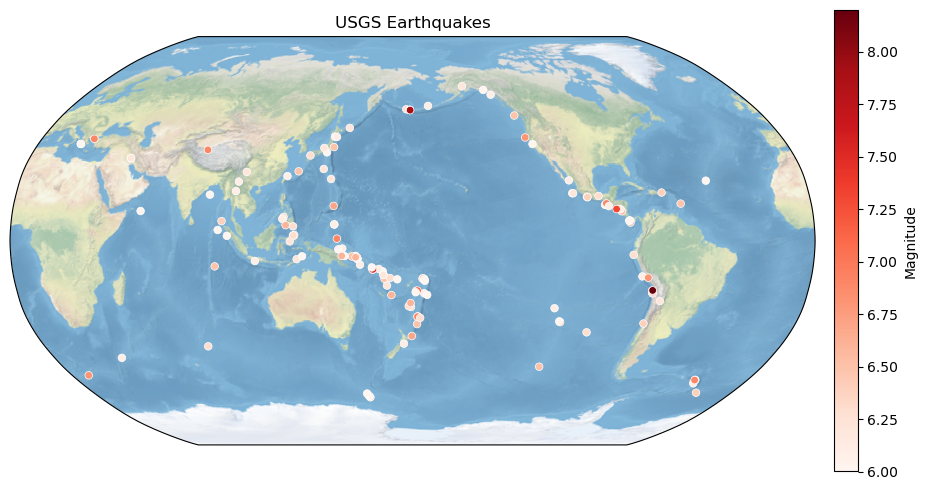

In [1]:
#PS4-1

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# 读取数据
file_path = r"C:\PS4\usgs_earthquakes.csv"
df = pd.read_csv(file_path)

# 只保留六级以上的地震
df = df[df["mag"] >= 6]


fig = plt.figure(figsize=(10, 5))

# 创建坐标轴
ax = fig.add_subplot(111, projection=ccrs.Robinson(central_longitude=180))

# 显示全世界范围
ax.set_global()
ax.stock_img()

# 取出经度和纬度
lon = df["longitude"].values
lat = df["latitude"].values

# 画出地震位置
sc = ax.scatter(
    lon, lat,
    c=df["mag"],
    cmap='Reds',
    s=30,
    transform=ccrs.PlateCarree(),
    edgecolors='white',
    linewidth=0.5
)

# 添加颜色条
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label("Magnitude")   

# 标题
plt.title("USGS Earthquakes")

# 调整布局
plt.tight_layout()

plt.show()